Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_4 (UpSampling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_5 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,353 (110.75 KB)

 Trainable params: 28,353 (110.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 118s 246ms/step - loss: 0.2413 - val_loss: 0.1174
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 115s 245ms/step - loss: 0.1145 - val_loss: 0.1080
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 115s 244ms/step - loss: 0.1083 - val_loss: 0.1053
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 245ms/step - loss: 0.1054 - val_loss: 0.1028
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 149s 260ms/step - loss: 0.1033 - val_loss: 0.1020
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 137s 249ms/step - loss: 0.1017 - val_loss: 0.0999
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 114s 244ms/step - loss: 0.1007 - val_loss: 0.0994
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 117s 249ms/step - loss: 0.0994 - val_loss: 0.0982
Epoch 9/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 245ms/step - loss: 0.0990 - val_loss: 0.0979
Epoch 10/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 116s 247ms/step - loss: 0.0983 - val_loss: 0.0973
Epoch 11/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 113s 240ms/step - loss: 0.0977 - val_loss: 0.0967
Epoch 12

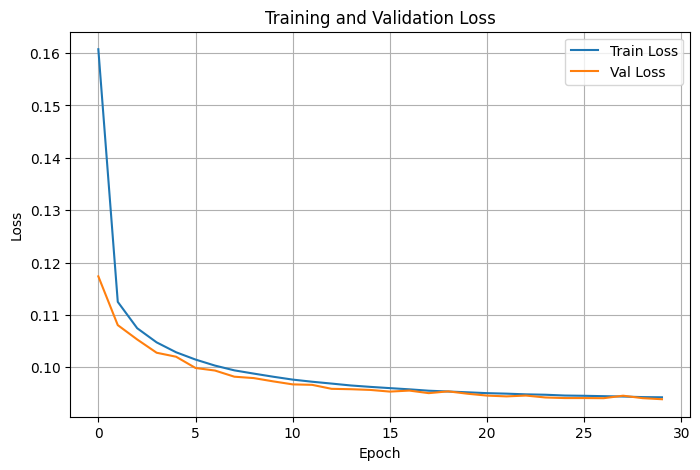

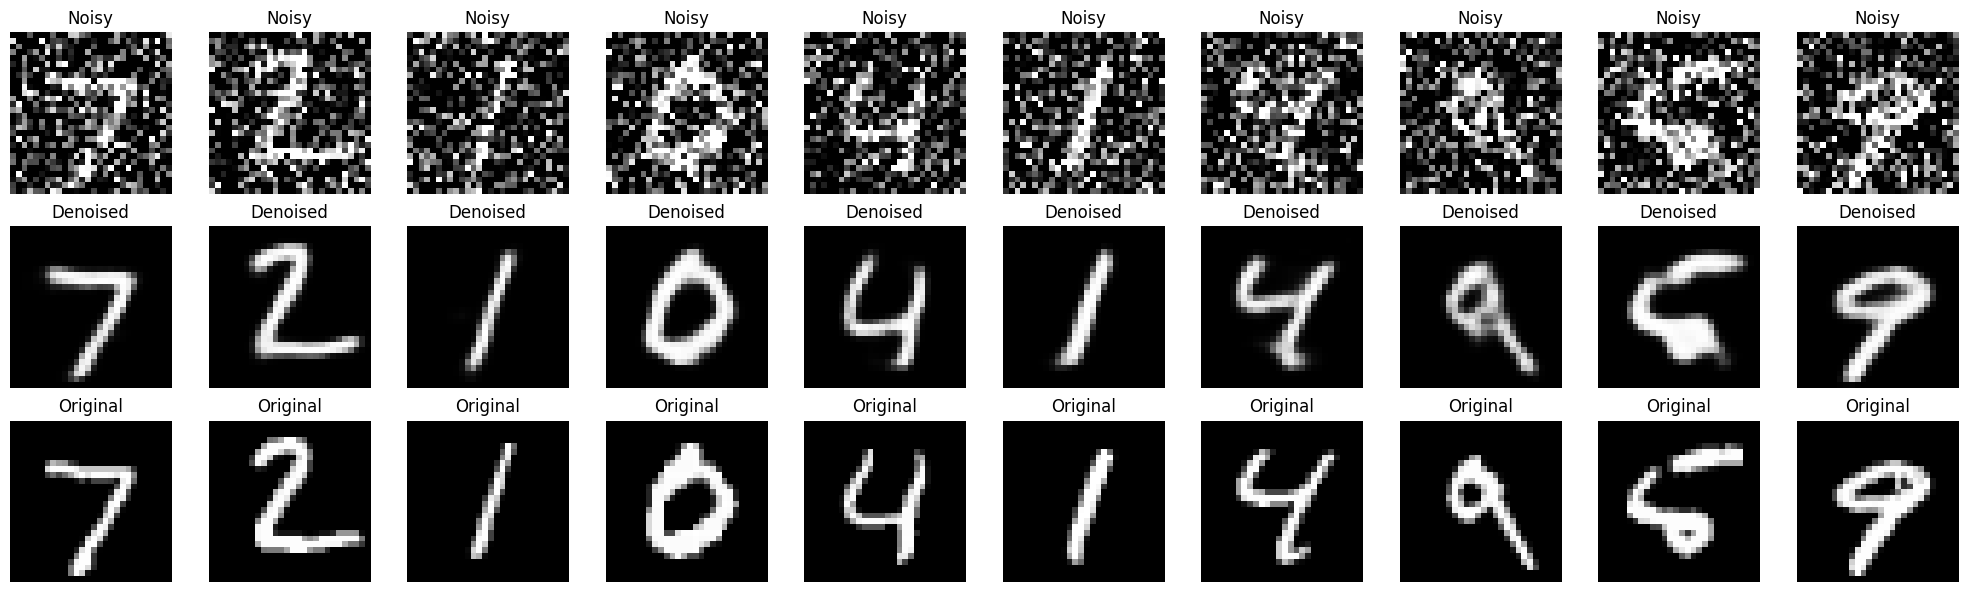

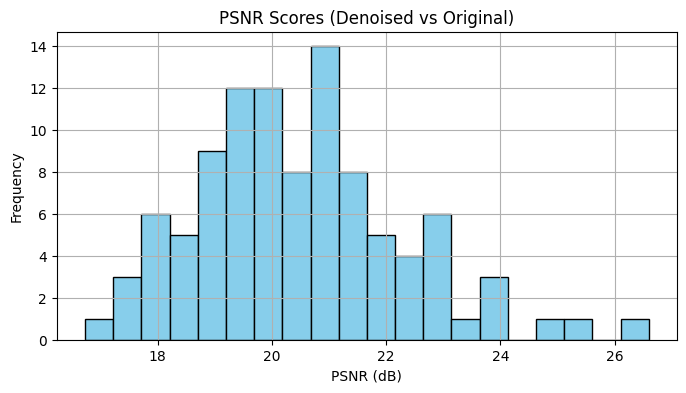

Average PSNR over 100 test samples: 20.48 dB


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.image import psnr
import tensorflow as tf

# Load MNIST data
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Add Gaussian noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Autoencoder Model
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

# Train
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = autoencoder.fit(
    x_train_noisy, x_train,
    epochs=30,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy, x_test),
    callbacks=[early_stop]
)

# Predict
decoded_imgs = autoencoder.predict(x_test_noisy)

# Plot 1: Loss Curve
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Noisy vs Denoised vs Original
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Noisy input
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Denoised output
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

    # Original image
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Plot 3: PSNR Comparison
psnr_scores = [psnr(tf.convert_to_tensor(x_test[i]), tf.convert_to_tensor(decoded_imgs[i]), max_val=1.0).numpy() for i in range(100)]
plt.figure(figsize=(8, 4))
plt.hist(psnr_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('PSNR Scores (Denoised vs Original)')
plt.xlabel('PSNR (dB)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# print average PSNR
print(f"Average PSNR over 100 test samples: {np.mean(psnr_scores):.2f} dB")


In [3]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 115.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 114.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 121.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.6 MB/s eta 0:00:00


In [5]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 20.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim, peak_signal_noise_ratio as psnr
import cv2

# ------------------ Load and Prepare CIFAR-10 ------------------
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Class names for better visualization
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# ------------------ Improved Noise Simulation ------------------
def add_realistic_noise(images):
    noisy_images = []
    for img in images:
        # Gaussian noise with random intensity
        sigma = np.random.uniform(0.05, 0.2)
        noisy = img + np.random.normal(0, sigma, img.shape)

        # Salt & pepper noise with random amount
        amount = np.random.uniform(0.01, 0.05)
        s_vs_p = 0.5
        out = np.copy(noisy)

        # Salt
        num_salt = np.ceil(amount * img.size * s_vs_p)
        coords = [np.random.randint(0, i, int(num_salt)) for i in img.shape]
        out[tuple(coords)] = 1

        # Pepper
        num_pepper = np.ceil(amount * img.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i, int(num_pepper)) for i in img.shape]
        out[tuple(coords)] = 0

        # Random blur (50% chance)
        if np.random.rand() > 0.5:
            ksize = np.random.choice([3, 5])
            out = cv2.GaussianBlur(out, (ksize, ksize), 0)

        noisy_images.append(np.clip(out, 0, 1))

    return np.array(noisy_images)

# Apply noise to datasets
x_train_noisy = add_realistic_noise(x_train)
x_test_noisy = add_realistic_noise(x_test)

# ------------------ Enhanced Autoencoder Architecture ------------------
def build_autoencoder():
    inputs = tf.keras.Input(shape=(32, 32, 3))

    # Encoder
    x = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2)(x)

    x = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2)(x)

    # Bottleneck
    x = layers.Conv2D(256, 3, activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)

    # Decoder
    x = layers.Conv2DTranspose(128, 3, strides=2, activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv2DTranspose(64, 3, strides=2, activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)

    outputs = layers.Conv2D(3, 3, activation='sigmoid', padding='same')(x)

    return tf.keras.Model(inputs, outputs)

# ------------------ Training Setup ------------------
autoencoder = build_autoencoder()
autoencoder.compile(optimizer='adam', loss='mse')  # Start with MSE for stability
autoencoder.summary()

# Callback for better training
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
history = autoencoder.fit(
    x_train_noisy, x_train,
    epochs=3,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy, x_test),
    callbacks=[reduce_lr]
)

# ------------------ Evaluation ------------------
def evaluate_metrics(clean, denoised):
    psnr_values = []
    ssim_values = []

    for i in range(len(clean)):
        psnr_values.append(psnr(clean[i], denoised[i], data_range=1.0))
        ssim_values.append(ssim(clean[i], denoised[i], channel_axis=-1, data_range=1.0))

    return {
        'psnr_mean': np.mean(psnr_values),
        'psnr_std': np.std(psnr_values),
        'ssim_mean': np.mean(ssim_values),
        'ssim_std': np.std(ssim_values)
    }

# Predict on test set
denoised_images = autoencoder.predict(x_test_noisy)

# Calculate metrics
metrics = evaluate_metrics(x_test, denoised_images)
print("\nEvaluation Metrics:")
print(f"PSNR: {metrics['psnr_mean']:.2f} ± {metrics['psnr_std']:.2f}")
print(f"SSIM: {metrics['ssim_mean']:.4f} ± {metrics['ssim_std']:.4f}")

# ------------------ Enhanced Visualization ------------------
def display_results(noisy, denoised, clean, labels, n=10):
    plt.figure(figsize=(20, 6))
    indices = np.random.choice(len(noisy), n, replace=False)

    for i, idx in enumerate(indices):
        # Noisy image
        plt.subplot(3, n, i+1)
        plt.imshow(noisy[idx])
        plt.title(f"Noisy\n{class_names[labels[idx][0]]}")
        plt.axis('off')

        # Denoised image
        plt.subplot(3, n, i+n+1)
        plt.imshow(denoised[idx])
        plt.title("Denoised")
        plt.axis('off')

        # Clean image
        plt.subplot(3, n, i+2*n+1)
        plt.imshow(clean[idx])
        plt.title("Original")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display random samples
display_results(x_test_noisy, denoised_images, x_test, y_test)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot metrics distribution
import matplotlib.pyplot as plt
import numpy as np# ------------------ Evaluation ------------------
def evaluate_metrics(clean, denoised):
    psnr_values = []
    ssim_values = []

    for i in range(len(clean)):
        # Convert numpy arrays to tensors for tf.image functions
        clean_tensor = tf.convert_to_tensor(clean[i])
        denoised_tensor = tf.convert_to_tensor(denoised[i])

        # PSNR calculation
        psnr_values.append(tf.image.psnr(clean_tensor, denoised_tensor, max_val=1.0).numpy())

        # SSIM calculation
        # SSIM requires channel axis for color images (rank 3 tensor), grayscale (rank 2) is fine
        # Ensure tensors have the correct rank for SSIM if necessary, but tf.image.ssim usually handles it if the last dim is channels
        ssim_values.append(tf.image.ssim(clean_tensor, denoised_tensor, max_val=1.0).numpy())


    return {
        'psnr_mean': np.mean(psnr_values),
        'psnr_std': np.std(psnr_values),
        'ssim_mean': np.mean(ssim_values),
        'ssim_std': np.std(ssim_values),
        # Also return the full lists
        'psnr_scores': psnr_values,
        'ssim_scores': ssim_values
    }

# Predict on test set
denoised_images = autoencoder.predict(x_test_noisy)

# Calculate metrics and get the full lists back
metrics = evaluate_metrics(x_test, denoised_images)

# Extract the full scores lists for plotting
psnr_scores = metrics['psnr_scores']
ssim_scores = metrics['ssim_scores']


print("\nEvaluation Metrics:")
print(f"PSNR: {metrics['psnr_mean']:.2f} ± {metrics['psnr_std']:.2f}")
print(f"SSIM: {metrics['ssim_mean']:.4f} ± {metrics['ssim_std']:.4f}")

# ------------------ Enhanced Visualization ------------------
def display_results(noisy, denoised, clean, labels, n=10):
    plt.figure(figsize=(20, 6))
    indices = np.random.choice(len(noisy), n, replace=False)

    for i, idx in enumerate(indices):
        # Noisy image
        plt.subplot(3, n, i+1)
        plt.imshow(noisy[idx])
        plt.title(f"Noisy\n{class_names[labels[idx][0]]}")
        plt.axis('off')

        # Denoised image
        plt.subplot(3, n, i+n+1)
        plt.imshow(denoised[idx])
        plt.title("Denoised")
        plt.axis('off')

        # Clean image
        plt.subplot(3, n, i+2*n+1)
        plt.imshow(clean[idx])
        plt.title("Original")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display random samples
display_results(x_test_noisy, denoised_images, x_test, y_test)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()




# metrics dictionary is already computed and contains mean, std, and scores lists

# Create figure with 1 row, 3 columns
plt.figure(figsize=(18, 5))

# 1. Histogram: PSNR
plt.subplot(1, 3, 1)
plt.hist(psnr_scores, bins=20, color='skyblue', edgecolor='black')
plt.axvline(metrics['psnr_mean'], color='red', linestyle='dashed', linewidth=1, label=f"Mean = {metrics['psnr_mean']:.2f}")
plt.title('PSNR Distribution')
plt.xlabel('PSNR (dB)')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()

# 2. Histogram: SSIM
plt.subplot(1, 3, 2)
plt.hist(ssim_scores, bins=20, color='lightgreen', edgecolor='black')
plt.axvline(metrics['ssim_mean'], color='red', linestyle='dashed', linewidth=1, label=f"Mean = {metrics['ssim_mean']:.4f}")
plt.title('SSIM Distribution')
plt.xlabel('SSIM')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()

# 3. Bar Plot: Mean ± Std
plt.subplot(1, 3, 3)
bar_colors = ['skyblue', 'lightgreen']
metric_names = ['PSNR', 'SSIM']
means = [metrics['psnr_mean'], metrics['ssim_mean']]
stds = [metrics['psnr_std'], metrics['ssim_std']]

bars = plt.bar(metric_names, means, yerr=stds, capsize=10, color=bar_colors, edgecolor='black')
for i, bar in enumerate(bars):
    height = bar.get_height()
    # Adjust text position slightly above the error bar
    plt.text(bar.get_x() + bar.get_width()/2, height + stds[i] + 0.01, f'{means[i]:.2f}', ha='center', va='bottom')


plt.title('Denoising Performance (Mean ± Std)')
plt.ylabel('Score')
# Adjust ylim to comfortably fit error bars and text labels
plt.ylim(0, max(means[0]+stds[0], means[1]+stds[1]) * 1.1 + 2)
plt.grid(True, axis='y')

# Final layout
plt.tight_layout()
plt.show()


